<a href="https://colab.research.google.com/github/laresamdeola/r-projects/blob/main/Building_a_Linear_Model_for_the_relationship_between_Salary_and_Years_of_Experience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import the libraries - this is for splitting the dataset into the train and test set

install.packages("caTools")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’




In [5]:
# splitting the dataset into the train and test set to avoid information leakage

dataset = read.csv("Salary_Data.csv")
library(caTools)
set.seed(123)
split = sample.split(dataset$Salary, SplitRatio = 2/3)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)

In [8]:
test_set

,YearsExperience,Salary
,<dbl>,<dbl>
2,1.3,46205
4,2.0,43525
5,2.2,39891
8,3.2,54445
11,3.9,63218
16,4.9,67938
20,6.0,93940
21,6.8,91738
24,8.2,113812


In [9]:
# fitting the linear model to the dataset(training data)

regressor = lm(formula = Salary ~ YearsExperience,
                data = training_set)

In [10]:
# Get the summary statistics of the linear model

summary(regressor)


Call:
lm(formula = Salary ~ YearsExperience, data = training_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-7325.1 -3814.4   427.7  3559.7  8884.6 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        25592       2646   9.672 1.49e-08 ***
YearsExperience     9365        421  22.245 1.52e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5391 on 18 degrees of freedom
Multiple R-squared:  0.9649,	Adjusted R-squared:  0.963 
F-statistic: 494.8 on 1 and 18 DF,  p-value: 1.524e-14


In [11]:
# using the predict function on the test set to see how the model performs with new data
# i.e. how generalized the model is

y_pred = predict(regressor, newdata = test_set)

In [12]:
y_pred

2         4         5         8        11        16        20        21 
 37766.77  44322.33  46195.35  55560.43  62115.99  71481.07  81782.66  89274.72 
       24        26 
102385.84 109877.90

In [13]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [14]:
library(ggplot2)

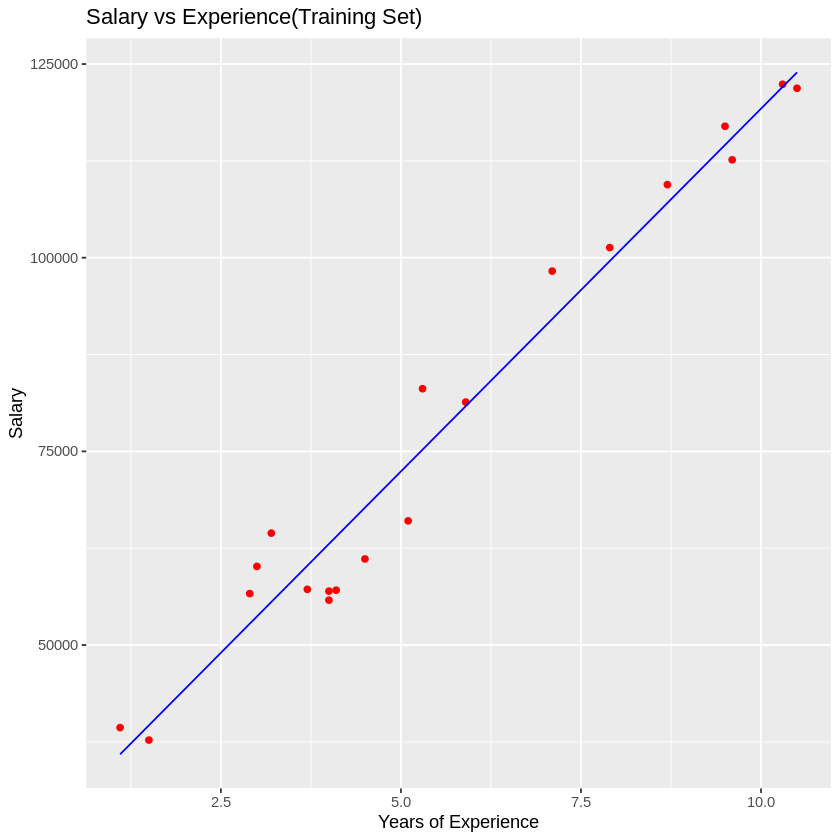

In [16]:
# Visualise the training set results

ggplot() +
  geom_point(aes(x = training_set$YearsExperience, y = training_set$Salary),
            colour = "red") +
  geom_line(aes(x = training_set$YearsExperience, y = predict(regressor, newdata = training_set)),
            colour = "blue") +
  ggtitle("Salary vs Experience(Training Set)") +
  xlab("Years of Experience") +
  ylab("Salary")

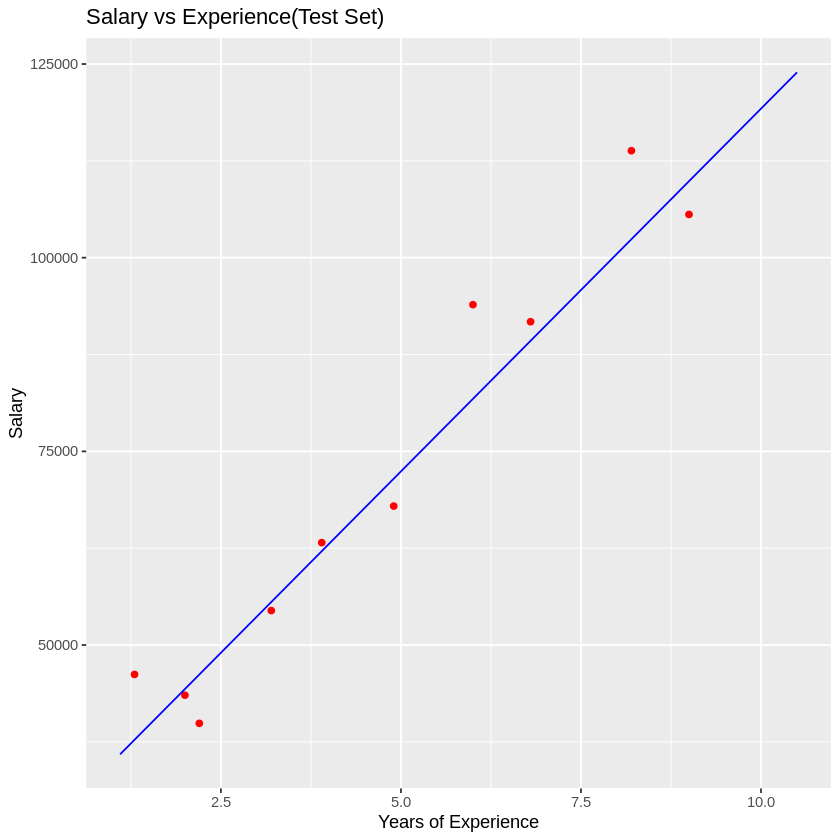

In [17]:
# Visualise the test set results

ggplot() +
  geom_point(aes(x = test_set$YearsExperience, y = test_set$Salary),
            colour = "red") +
  geom_line(aes(x = training_set$YearsExperience, y = predict(regressor, newdata = training_set)),
            colour = "blue") +
  ggtitle("Salary vs Experience(Test Set)") +
  xlab("Years of Experience") +
  ylab("Salary")